# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

In [1]:
# Initializing imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline


ImportError: cannot import name 'NewsApiClient' from 'newsapi' (/Users/abraraman/opt/anaconda3/lib/python3.8/site-packages/newsapi/__init__.py)

In [2]:
# Reading api key environment variable

load_dotenv()

NameError: name 'load_dotenv' is not defined

In [57]:
# Creating a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [58]:
# Fetching the Bitcoin news articles

bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en")

In [59]:
# Fetching the Ethereum news articles

eth_news = newsapi.get_everything(
    q="ethereum",
    language="en")

In [60]:
# Creating the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu})
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Rearranging/cleaning up the dataframe columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

date                                               text  compound  \
0  2021-08-06  When my wife started a little garden in our ur...   -0.3400   
1  2021-07-19  Like Dogecoin devotees, the mayor of Reno, and...    0.6908   
2  2021-08-10  Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...    0.4019   
3  2021-08-12  By Joe TidyCyber reporter \r\n"Follow the mone...   -0.8860   
4  2021-07-23  To get a roundup of TechCrunchs biggest and mo...    0.6240   

   positive  negative  neutral  
0     0.000     0.061    0.939  
1     0.178     0.000    0.822  
2     0.080     0.000    0.920  
3     0.000     0.271    0.729  
4     0.127     0.000    0.873

In [61]:
# Creating the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu})
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)

# Rearranging/cleaning up the dataframe columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

date                                               text  compound  \
0  2021-07-29  Blockchain infrastructure startups are heating...   -0.2411   
1  2021-08-05  Cent was founded in 2017 as an ad-free creator...    0.6956   
2  2021-08-10  After the bell today, Coinbase reported anothe...    0.5719   
3  2021-08-05  Representation of the Ethereum virtual currenc...    0.0000   
4  2021-08-05  HONG KONG, Aug 5 (Reuters) - Ether held near t...    0.0000   

   positive  negative  neutral  
0     0.000     0.061    0.939  
1     0.190     0.000    0.810  
2     0.139     0.000    0.861  
3     0.000     0.000    1.000  
4     0.000     0.000    1.000

In [62]:
# Describing the Bitcoin Sentiment
bitcoin_df.describe()

compound   positive   negative    neutral
count  20.000000  20.000000  20.000000  20.000000
mean    0.034640   0.047050   0.040100   0.912850
std     0.435160   0.058669   0.069485   0.074081
min    -0.886000   0.000000   0.000000   0.729000
25%    -0.307000   0.000000   0.000000   0.861750
50%     0.000000   0.000000   0.000000   0.914500
75%     0.416125   0.090750   0.076250   1.000000
max     0.690800   0.178000   0.271000   1.000000

In [63]:
# Describing the Ethereum Sentiment
eth_df.describe()

compound   positive   negative    neutral
count  20.000000  20.000000  20.000000  20.000000
mean    0.069495   0.040750   0.017600   0.941600
std     0.303311   0.061087   0.032365   0.064087
min    -0.440400   0.000000   0.000000   0.810000
25%     0.000000   0.000000   0.000000   0.892500
50%     0.000000   0.000000   0.000000   0.948000
75%     0.226300   0.059250   0.011500   1.000000
max     0.695600   0.190000   0.094000   1.000000

### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest meand positive score

Q: Which coin had the highest compound score?

A: A: Ethereum had the highest comnpund score

Q. Which coin had the highest positive score?

A: A: Ethereum had the highest positive score


---

## 2. Natural Language Processing
---
###   Tokenizer

In [64]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [65]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

# Creating a list of stopwords
stopwords_list = (stopwords.words('english'))

# Expanding the default stopwords list if necessary

expanded_list = ["Chars", "Data", "Another", "Photo", "Joe", "Reuters", "Reutersdado"]

stop_words = stopwords_list + expanded_list

In [68]:
# Completing the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Removing the stop words
    stpwrds = set(stop_words)
    
    # Removing the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Creating a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatizing words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Converting the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in stpwrds]
    
    return tokens 

In [69]:
# Creating a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

date                                               text  compound  \
0  2021-08-06  When my wife started a little garden in our ur...   -0.3400   
1  2021-07-19  Like Dogecoin devotees, the mayor of Reno, and...    0.6908   
2  2021-08-10  Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...    0.4019   
3  2021-08-12  By Joe TidyCyber reporter \r\n"Follow the mone...   -0.8860   
4  2021-07-23  To get a roundup of TechCrunchs biggest and mo...    0.6240   

   positive  negative  neutral  \
0     0.000     0.061    0.939   
1     0.178     0.000    0.822   
2     0.080     0.000    0.920   
3     0.000     0.271    0.729   
4     0.127     0.000    0.873   

                                              tokens  
0  [wife, started, little, garden, urban, backyar...  
1  [like, dogecoin, devotee, mayor, reno, leader,...  
2  [photo, joe, raedlegetty, images, twitter, squ...  
3  [joe, tidycyber, reporter, follow, money, gene...  
4  [get, roundup, techcrunchs, biggest, important...

In [70]:
# Creating a new tokens column for Ethereum
eth_df["tokens"] = eth_df.text.apply(tokenizer)
eth_df.head()

date                                               text  compound  \
0  2021-07-29  Blockchain infrastructure startups are heating...   -0.2411   
1  2021-08-05  Cent was founded in 2017 as an ad-free creator...    0.6956   
2  2021-08-10  After the bell today, Coinbase reported anothe...    0.5719   
3  2021-08-05  Representation of the Ethereum virtual currenc...    0.0000   
4  2021-08-05  HONG KONG, Aug 5 (Reuters) - Ether held near t...    0.0000   

   positive  negative  neutral  \
0     0.000     0.061    0.939   
1     0.190     0.000    0.810   
2     0.139     0.000    0.861   
3     0.000     0.000    1.000   
4     0.000     0.000    1.000   

                                              tokens  
0  [blockchain, infrastructure, startup, heating,...  
1  [cent, wa, founded, adfree, creator, network, ...  
2  [bell, today, coinbase, reported, another, per...  
3  [representation, ethereum, virtual, currency, ...  
4  [hong, kong, aug, reuters, ether, held, near, ...

---

### NGrams and Frequency Analysis

In [71]:
from collections import Counter
from nltk import ngrams

In [72]:
# Generating the Bitcoin N-grams where N=2
bitcoin_string = bitcoin_df.text.str.cat()
bitcoin_token = tokenizer(bitcoin_string)

bitcoin_bigram_counts = Counter(ngrams(bitcoin_token, n=2))
bitcoin_bigram_counts.most_common(10)

[(('illustration', 'taken'), 5),
 (('reuters', 'bitcoin'), 4),
 (('bitcoin', 'seen'), 4),
 (('july', 'reuters'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('seen', 'front'), 3),
 (('roughly', 'million'), 2),
 (('data', 'breach'), 2),
 (('representation', 'virtual'), 2)]

In [73]:
# Generating the Ethereum N-grams where N=2
eth_string = eth_df.text.str.cat()
eth_token = tokenizer(eth_string)

eth_bigram_counts = Counter(ngrams(tokenizer(eth_string), n=2))
eth_bigram_counts.most_common(10)

[(('pc', 'motherboard'), 4),
 (('illustration', 'taken'), 4),
 (('reutersdado', 'ruvicillustrationnew'), 3),
 (('ruvicillustrationnew', 'york'), 3),
 (('aug', 'reuters'), 3),
 (('ethereum', 'placed'), 3),
 (('placed', 'pc'), 3),
 (('motherboard', 'illustration'), 3),
 (('taken', 'june'), 3),
 (('june', 'reutersdado'), 3)]

In [74]:
# Generating the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [75]:
# Using token_count to get the top 10 words for Bitcoin
token_count(bitcoin_token, N=10)

[('bitcoin', 10),
 ('reuters', 7),
 ('july', 5),
 ('seen', 5),
 ('illustration', 5),
 ('taken', 5),
 ('data', 4),
 ('reutersdado', 4),
 ('cryptocurrency', 3),
 ('charsby', 3)]

In [76]:
# Using token_count to get the top 10 words for Ethereum
token_count(eth_token, N=10)

[('ethereum', 13),
 ('reuters', 7),
 ('bitcoin', 7),
 ('ha', 7),
 ('illustration', 5),
 ('reutersdado', 5),
 ('ether', 5),
 ('blockchain', 4),
 ('network', 4),
 ('pc', 4)]

---

### Word Clouds


In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

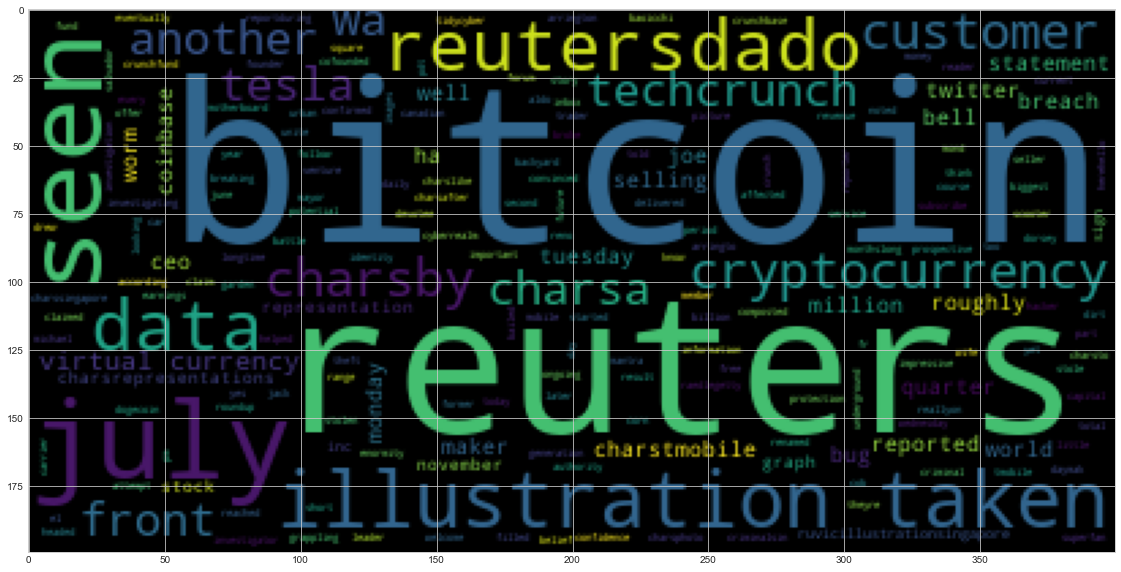

In [78]:
# Generating the Bitcoin word cloud
bit_cloud = " ".join(bitcoin_token)
wc = WordCloud().generate(bit_cloud)
plt.imshow(wc)

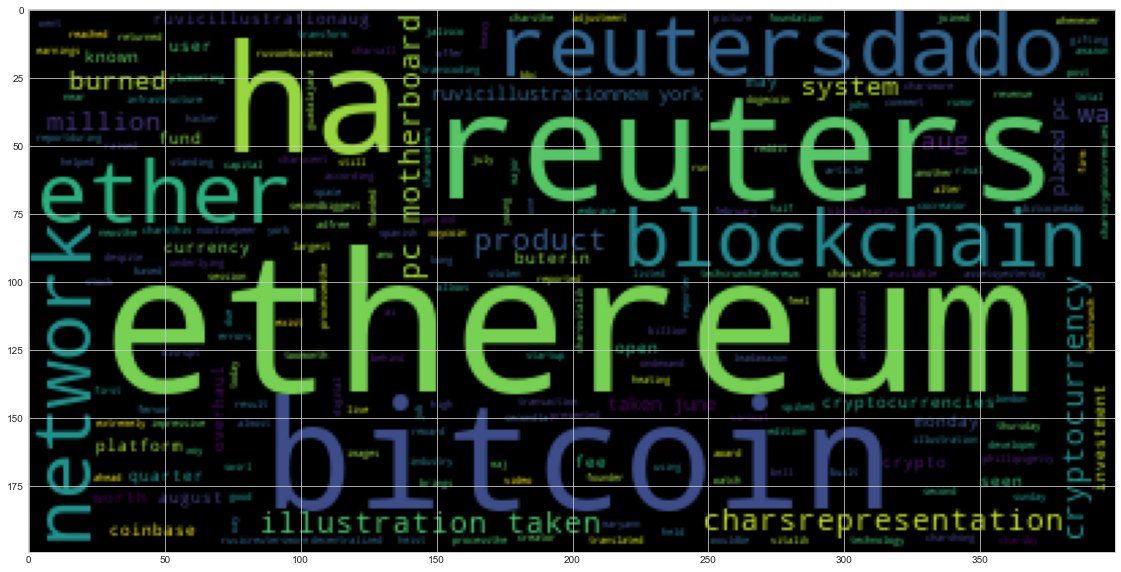

In [79]:
# Generating the Ethereum word cloud
eth_cloud = " ".join(eth_token)
wc = WordCloud().generate(eth_cloud)
plt.imshow(wc)

---
## 3. Named Entity Recognition


In [80]:
import spacy
from spacy import displacy

In [82]:
# Loading the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [86]:
# Running the NER processor on all of the text
btc_nlp=nlp(bitcoin_string)

# Adding a title to the document
btc_nlp.user_data["title"] = "Bitcoin NER"


In [87]:
# Rendering the visualization
displacy.render(btc_nlp, style='ent')


In [88]:
# Listing all Entities
btc_entities = [ent.text for ent in btc_nlp.ents]
btc_entities

['Reno',
 'El Salvador',
 'Aldo Baoicchi',
 'Canadian',
 'Daymak',
 'Joe Raedle/',
 'Twitter',
 'Square',
 'Jack Dorsey',
 'Monday',
 'Joe',
 'every day',
 '3 p.m. PDT',
 'Daily Crunch',
 'July 23, 2021',
 'chars]T-Mobile',
 'two years',
 'roughly 49 million',
 'Michael Arrington',
 'TechCrunch',
 'Crunchbase',
 'CrunchFund',
 'Tuesday',
 '2017',
 'today',
 'Coinbase',
 'its second quarter',
 'the quarter',
 'Coinbase',
 '$2.23 billion',
 'July 28',
 'Reuters',
 '40,000',
 'Wednesday',
 'Motherboard',
 'T-Mobile',
 'Roughly 47.8 million',
 'June 7, 2021',
 'REUTERS',
 'Edgar Su/IllustrationAug',
 'Reuters',
 '7.07%',
 '47,587.38',
 '2200',
 'Martin/CNET\r\nA',
 'UK',
 'Spain',
 'Twitter',
 '2020',
 'the US Department of Justi',
 'November 19, 2020',
 'REUTERS',
 'Dado Ruvic/IllustrationSINGAPORE',
 'July 21',
 'Reuters',
 'Reuters',
 'FILE',
 'November 19, 2020',
 'REUTERS',
 'Dado Ruvic/Illustration\r\nSINGAPORE',
 '+410',
 'Dado Ruvic/Illustration\r\nWelcome',
 '10',
 'the Opening Be

---

### Ethereum NER

In [90]:
# Running the NER processor on all of the text
eth_nlp=nlp(eth_string)

# Adding a title to the document
eth_nlp.user_data["title"] = "Ethereum NER"

In [91]:
# Rendering the visualization
displacy.render(eth_nlp, style='ent')

In [92]:
# Listing all Entities
eth_entities = [ent.text for ent in eth_nlp.ents]
eth_entities

['2017',
 'Reddit',
 'Ethereum',
 'today',
 'Coinbase',
 'its second quarter',
 'the quarter',
 'Coinbase',
 '$2.23 billion',
 'Ethereum',
 'February 3, 2018',
 'REUTERS',
 'Dado Ruvic',
 'Aug 5',
 'Reuters',
 'Aug 5',
 'Reuters',
 'two-month',
 'Thursday',
 'Ethereum',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic/IllustrationAug 3',
 'Reuters',
 'Ethereum',
 'Monday',
 'Amazon',
 'Amazon',
 'Mary-Ann RussonBusiness',
 'BBC News',
 'almost half',
 '$600m',
 '433',
 'Yesterday',
 'chars]Vitalik Buterin',
 'TechCrunch Disrupt London 2015',
 'John Phillips',
 'Vitalik Buterin',
 'Ethereum',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic',
 'July 30',
 'Reuters',
 'second',
 'August 5',
 'Sunday',
 'over 45,799',
 'second',
 'Dado Ruvic',
 'Reuters',
 'More than $144 million',
 'Livepeer',
 '$20 million',
 'Ethereum',
 'Spanish',
 'AI',
 'Xoy Capital',
 'Guadalajara',
 'Jalisco',
 'Xoycoin',
 'Ethereum',
 'Monday',
 'Chicago Bulls',
 'American Express',
 'Ethereum',
 'June 29, 2021',
 'REUTERS',

---